# Esercizio 11.1
L'esercizio richiede di operare sui parametri $N_{\mathrm{epochs}}$, $N_{\mathrm{train}}$ e $\sigma$ di una $NN$ per valutare come questi influenzino la predizione della rete neurale della funzione lineare:
$$
f(x)=2x+1
$$

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


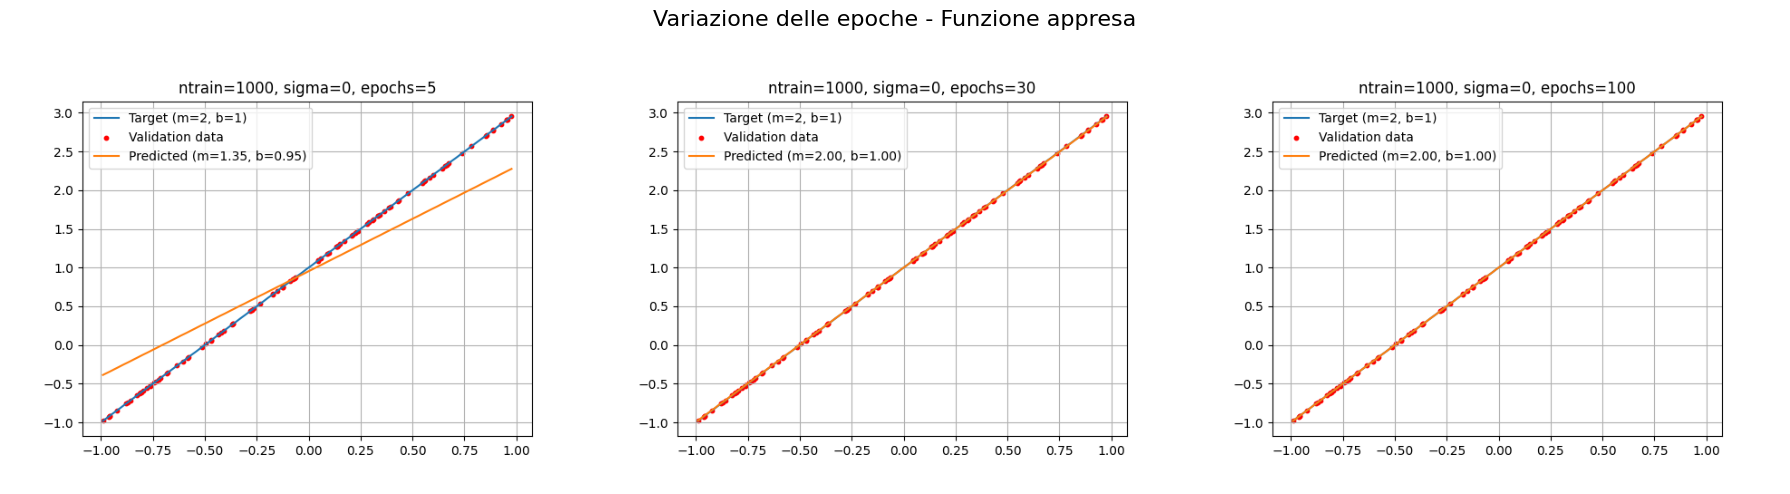

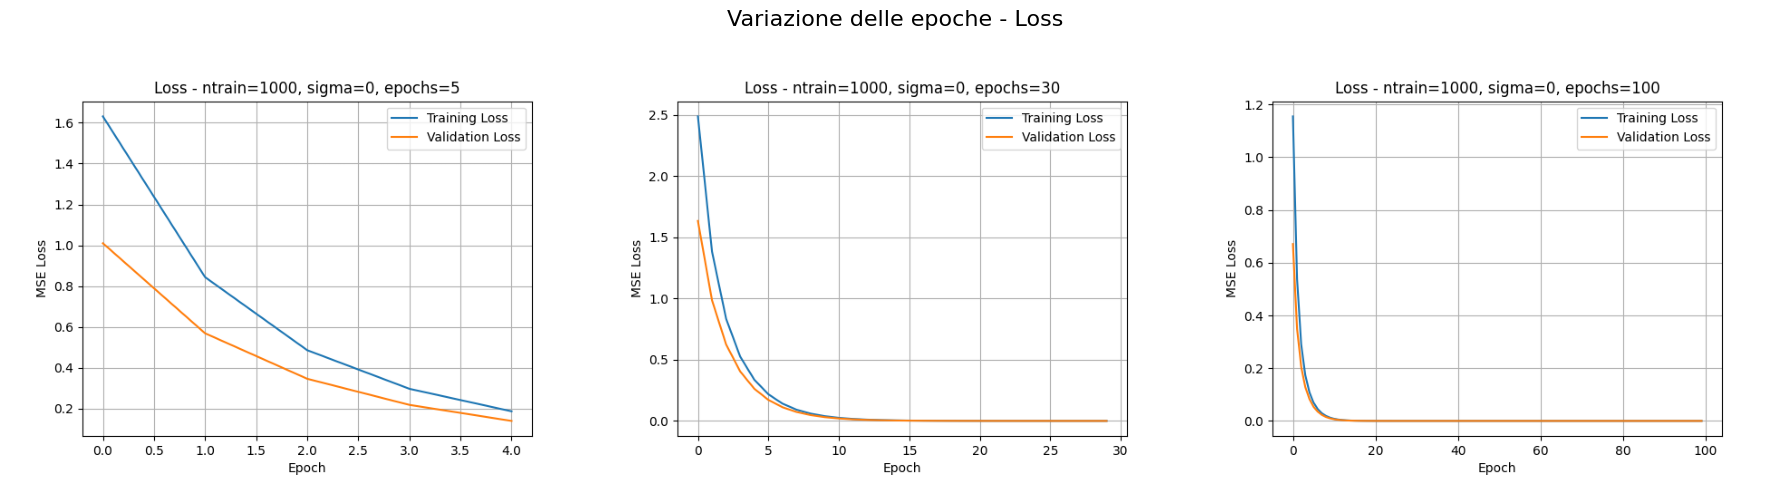

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


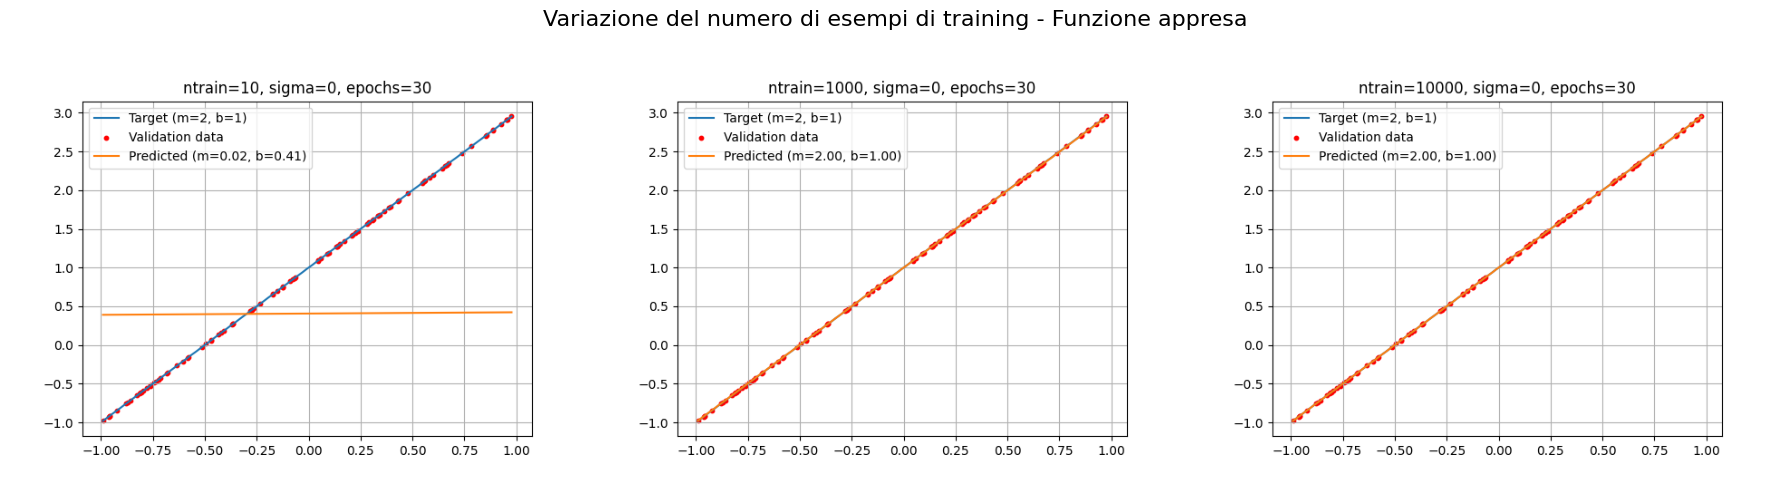

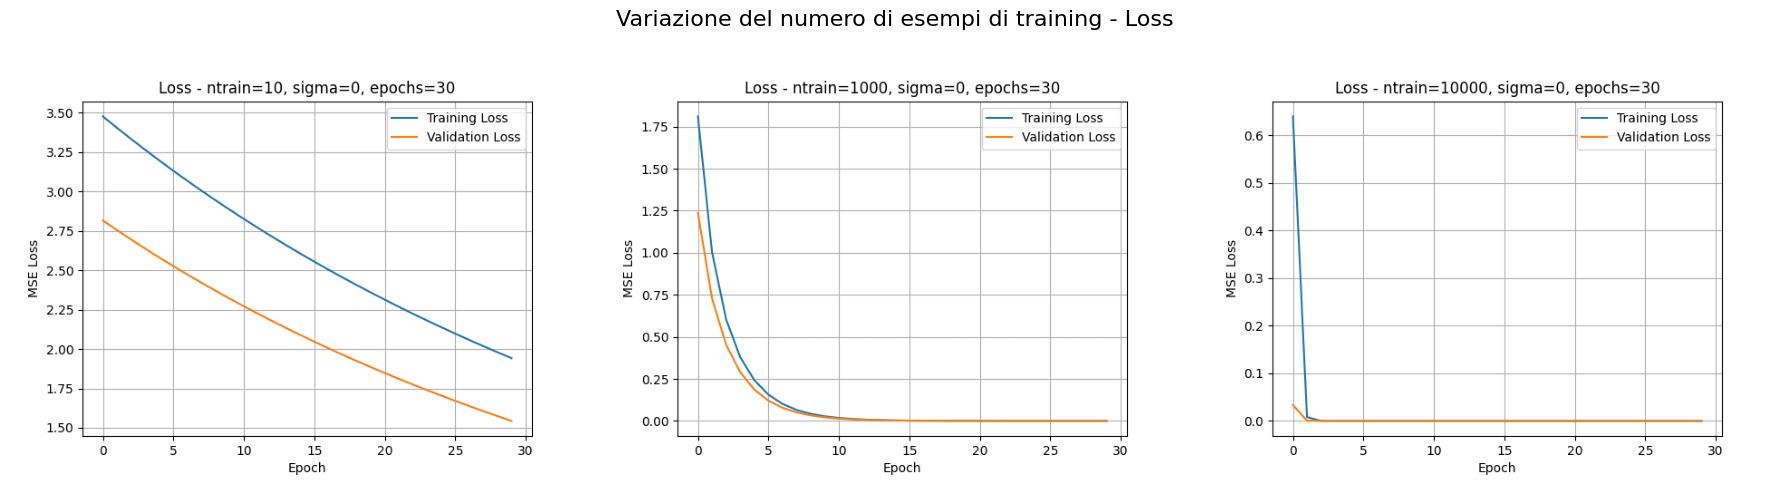

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


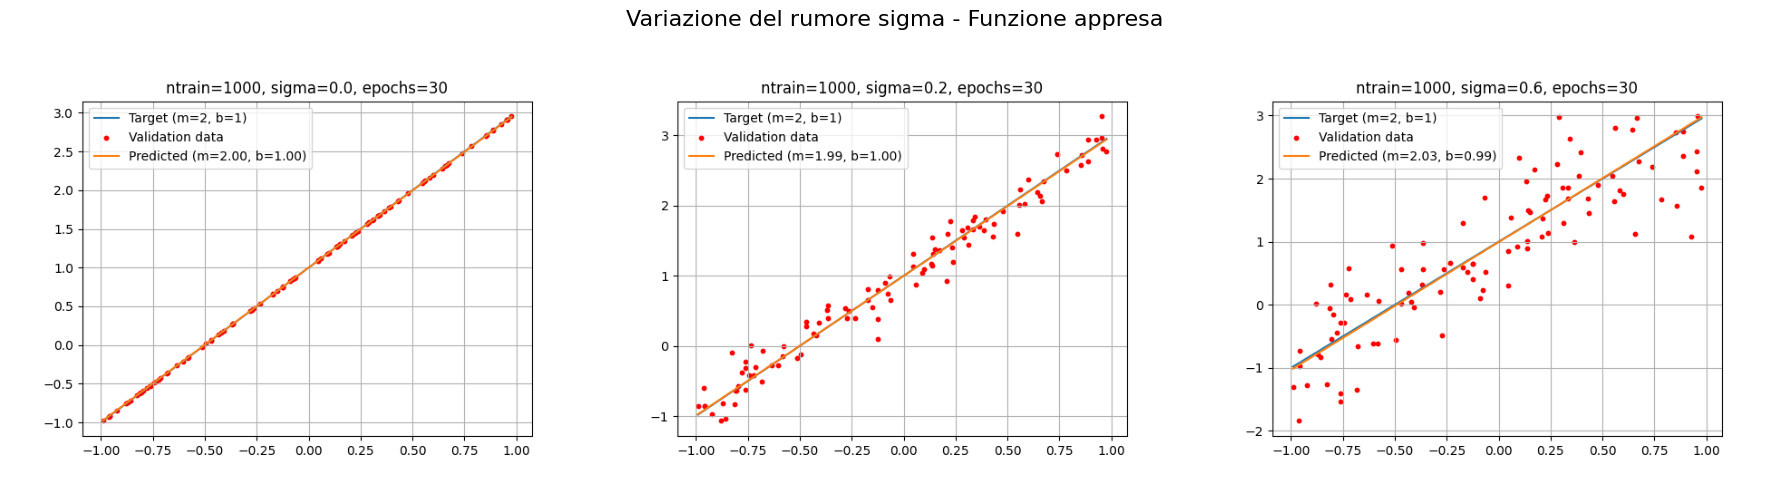

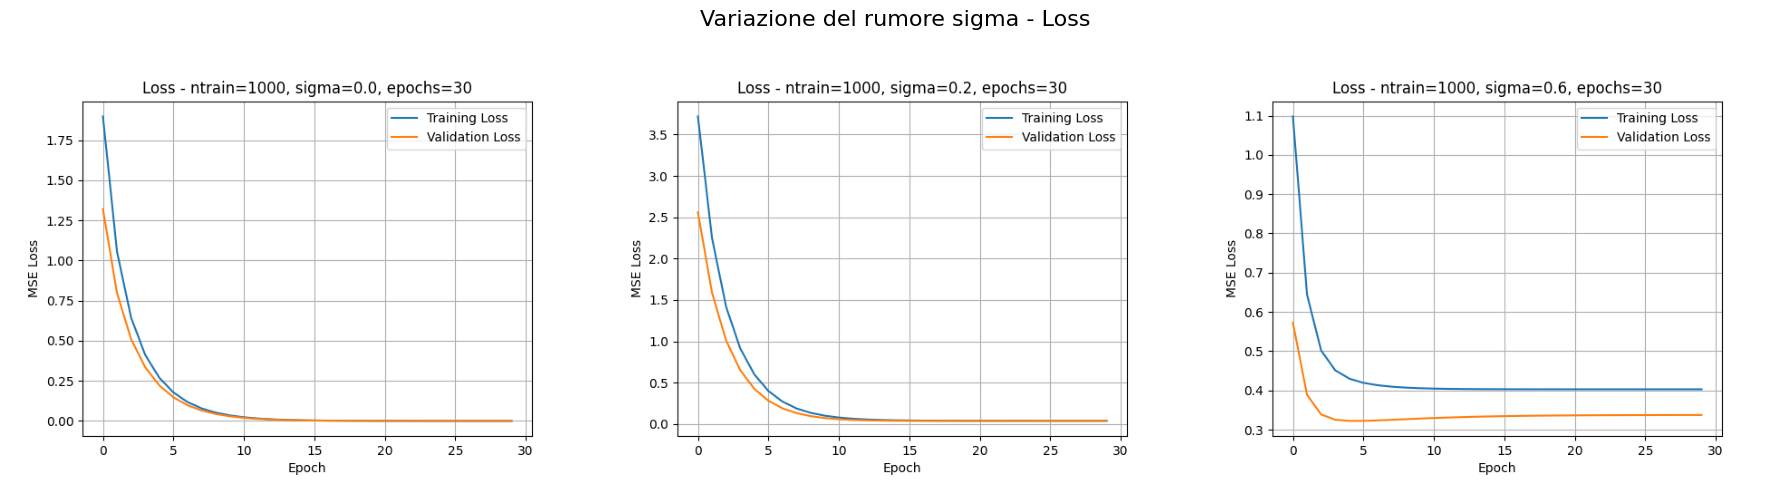

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Parametri target
m_true = 2
b_true = 1

seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Dati di validazione fissi
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()

# Funzione di training che restituisce i plot
def train_and_plot(ntrain, nepochs, sigma):
    x_train = np.random.uniform(-1, 1, ntrain)#x di training
    y_target = m_true * x_valid + b_true #funzione target
    y_train = np.random.normal(m_true * x_train + b_true, sigma)#y di training
    y_valid = np.random.normal(m_true * x_valid + b_true, sigma)#y di validazione

    #preparo la rete neurale
    model = Sequential()
    model.add(Dense(1, input_shape=(1,)))

    model.compile(optimizer='sgd', loss='mse')

    #addestramento
    history = model.fit(x_train, y_train,
                        batch_size=32,
                        epochs=nepochs,
                        shuffle=True,
                        validation_data=(x_valid, y_valid),
                        verbose=0)

    #pesi e bias dell'ultimo neurone
    weights, bias = model.get_weights()
    m_fit = weights[0][0]
    b_fit = bias[0]

    #predizione della rete sui dati di validazione
    y_pred = model.predict(x_valid)

    # Primo grafico: funzione target, validation data e funzione predetta
    fig1 = plt.figure()
    plt.plot(x_valid, y_target, label='Target (m=2, b=1)')
    plt.scatter(x_valid, y_valid, color='r', label='Validation data', s=10)
    plt.plot(x_valid, y_pred, label=f'Predicted (m={m_fit:.2f}, b={b_fit:.2f})')
    plt.legend()
    plt.grid(True)
    plt.title(f"ntrain={ntrain}, sigma={sigma}, epochs={nepochs}")

    # Secondo grafico: loss su training e validation data
    fig2 = plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss - ntrain={ntrain}, sigma={sigma}, epochs={nepochs}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    
    plt.close(fig1)
    plt.close(fig2)

    return fig1, fig2

# Utility per mostrare 3 grafici in riga
def show_grid(figs, title):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))#inserisce 3 figure in una griglia 1X3
    fig.suptitle(title, fontsize=16)#titolo globale
    for i, subfig in enumerate(figs):
        tmp = subfig.axes[0]
        canvas = tmp.get_figure().canvas# "superficie" su cui disegnare
        canvas.draw()#disegno
        axs[i].imshow(np.array(canvas.buffer_rgba()))#in pratica trasforma il grafico originale in un subplot così da inseriro nella griglia
        axs[i].axis('off')#disabilita gli assi dei subplot perchè mostra una griglia globale di diverse immagini
    plt.tight_layout()
    plt.show()

# ciclo 1: vario epochs
fit_figs, loss_figs = [], []#preparo gli oggetti da caricare in showgrid
for nepochs in [5, 30, 100]:
    fig_fit, fig_loss = train_and_plot(ntrain=1000, nepochs=nepochs, sigma=0)# inizializzo con le figure ottenute con la rete neurale
    #inserisco le figure negli oggetti appositi
    fit_figs.append(fig_fit)
    loss_figs.append(fig_loss)

#creo le griglie 3X1
show_grid(fit_figs, "Variazione delle epoche - Funzione appresa")
show_grid(loss_figs, "Variazione delle epoche - Loss")

#ripeto per il secondo ciclo
# ciclo 2: vario ntrain
fit_figs, loss_figs = [], []
for ntrain in [10, 1000, 10000]:
    fig_fit, fig_loss = train_and_plot(ntrain=ntrain, nepochs=30, sigma=0)
    fit_figs.append(fig_fit)
    loss_figs.append(fig_loss)

show_grid(fit_figs, "Variazione del numero di esempi di training - Funzione appresa")
show_grid(loss_figs, "Variazione del numero di esempi di training - Loss")

#ripeto per il terzo ciclo
# Esperimento 3: vario sigma
fit_figs, loss_figs = [], []
for sigma in [0.0, 0.2, 0.6]:
    fig_fit, fig_loss = train_and_plot(ntrain=1000, nepochs=30, sigma=sigma)
    fit_figs.append(fig_fit)
    loss_figs.append(fig_loss)

show_grid(fit_figs, "Variazione del rumore sigma - Funzione appresa")
show_grid(loss_figs, "Variazione del rumore sigma - Loss")

## Analisi e commento
**Variazione delle epoche**

Con poche epoche la rete neurale fatica a predire modelli soddisfacenti e accurati: non ha eseguito abbastanza cicli di addestramento. Se il numero di epoche fosse molto grande, ci sarebbe il rischio di overfitting su $N_{\mathrm{train}}$ per l'eccessivo addestramento su quei dati e dunque una loss minima per i dati di addestramento mentre una loss più consistente per i dati di validazione. In questo caso tale fenomeno non si osserva perchè la funzione e dunque la rete neurale è molto semplice, siamo nel caso lineare.

**Variazione di $N_{\mathrm{train}}$**

Con pochi $N_{\mathrm{train}}$ la rete neurale fatica a predire modelli accurati: anche in questo caso l'addestramento non è stato adeguato. Troppi pochi dati compromettono la capacità dell'algoritmo di fare previsioni globali. All'aumentare di $N_{\mathrm{train}}$ invece si rischia l'overfitting, ma, come per il numero di epoche, questo fenomeno non si osserva perchè la funzione e dunque la rete neurale è molto semplice, siamo nel caso lineare.

**Variazione di $\sigma$**

Variando sigma i dati di validazione e addestramento sono più "sporcati". Ciò compromette una corretta predizione della rete neurale e aumenta notevolmente la loss sia sui dati di addestramento sia sui dati di validazione. Con $\sigma$ troppo elevato diventerebbe impossibile la predizione della funzione target perchè si tratterebbe di fittare dei dati sparsi casualmente con una funzione lineare. 

## Bonus: rete neurale complessa

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test loss on validation data (MSE): 0.054509229958057404


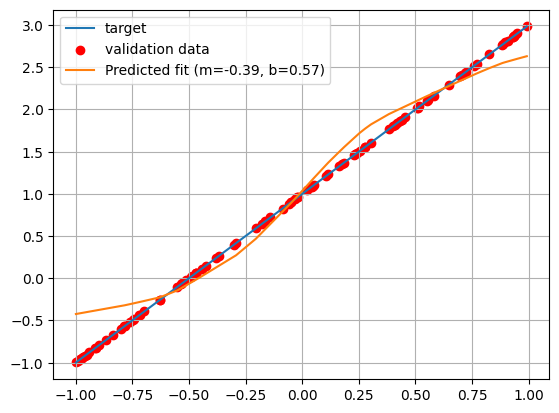

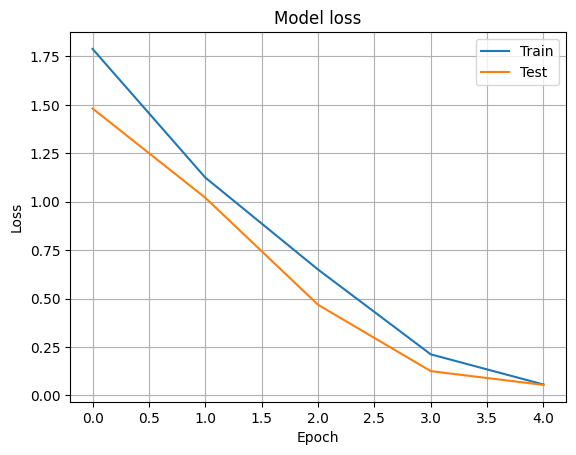

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


# Parametri target della funzione f(x) = m*x + b
m = 2  # coefficiente angolare (pendenza)
b = 1  # intercetta

# imposto i seed per replicabilità dei dati
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#genero i dati di input
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # target ideale, funzione lineare

sigma = 0.0 # rumore sulle y
y_train = np.random.normal(m * x_train + b, sigma) # valori su cui eseguire l'addestramento
y_valid = np.random.normal(m * x_valid + b, sigma) #valori su cui eseguire la validazione

#creazione del modello
model = tf.keras.Sequential()
model = tf.keras.Sequential()
model.add(Dense(15, input_shape=(1,), activation='relu'))  # hidden layer 1
model.add(Dense(18, activation='relu'))                    # hidden layer 2
model.add(Dense(12, activation='relu'))                    # hidden layer 3
model.add(Dense(1))  # output layer (con attivazione lineare di default)


# Compilazione del modello: scelgo ottimizzatore, funzione di loss e metriche
model.compile(optimizer='sgd', loss='mse' 
              #,metrics=['mse']
              )
#loss è la funzione da minimizzare durante l'addestramento. Metrics invece 
#sono valori calcolati per valutare le prestazioni del modello, ma non influenzano direttamente l’addestramento.

#addestramento del modello
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=5,
          shuffle=True, # mischio i dati di input ad ogni epoche
          validation_data=(x_valid, y_valid),
          verbose=0)#verbose = 0 non stampa a schero i dati dell'addestramento

weights, bias = model.layers[-1].get_weights() #prendo peso e bias dell'ultimo neurone
m_fit = weights[0][0]  # peso
b_fit = bias[0]        # bias/intercetta

#ordinate predette dalla rete neurale
y_pred = model.predict(x_valid)

# Valutazione finale del modello sui dati di validazione
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

#stampa della loss
print('Test loss on validation data (MSE):', score)

#print('Test metric :', score[1])

#plotto dei dati di validazione, della funzione target e del predict dela rete neurale
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.plot(x_valid, y_pred, label=f'Predicted fit (m={m_fit:.2f}, b={b_fit:.2f})')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()

#plotto la loss sui dati di validazione ed allenamento
plt.plot(history.history['loss'])# Loss sul training set per ogni epoca
plt.plot(history.history['val_loss'])   # Loss sul validation set per ogni epoca
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

## Analisi e Commento
In questo script la rete neurale è resa leggermente e inutilmente più complessa con l'aggiunta di hidden layer e funzioni di attivazione non lineare dei neuroni. Questo compromette la capacità delle rete di predirre soddisfacemente la funzione lineare, paradossalmente proprio a causa di un eccesso di complessità rispetto alla semplicità del problema. Si può quindi concludere che un buon modello di predizione con reti neurali deve calibrare la complessità della rete in base alla complessità del problema da risolvere. Non sempre una rete più complessa è una buona scelta.

# Esercizio 11.2
L'esercizio richiede di eseguire un fit della funzione:
$$
f(x)=4-3x-2x^2+3x^3
$$
con $x \in [-1,1]$. Addestramento e validazione devono essere eseguiti in $x \in [-1,1]$. Successivamente verificare la capacità della rete neurale del predire la funzione in un intervallo al di fuori dell'intervallo di addestramento e validazione, in questo caso $x \in [2.5,3.5]$.

Out-of-range loss (MSE): 546.74191
Training loss: 0.807868242263794
Validation loss: 1.059531807899475


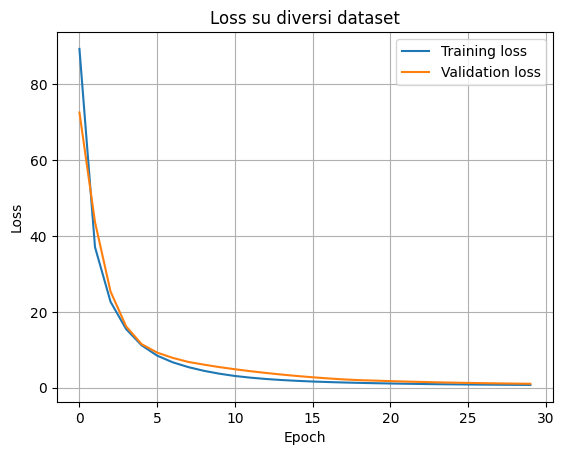

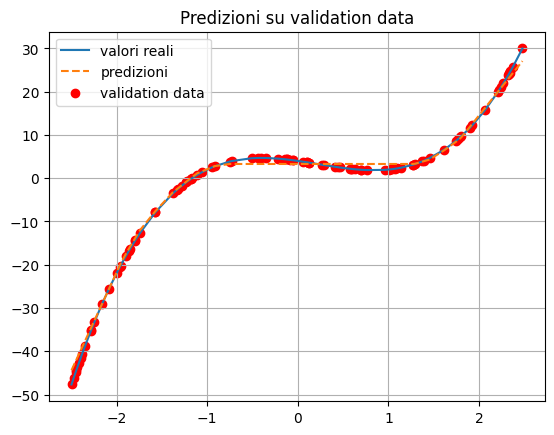

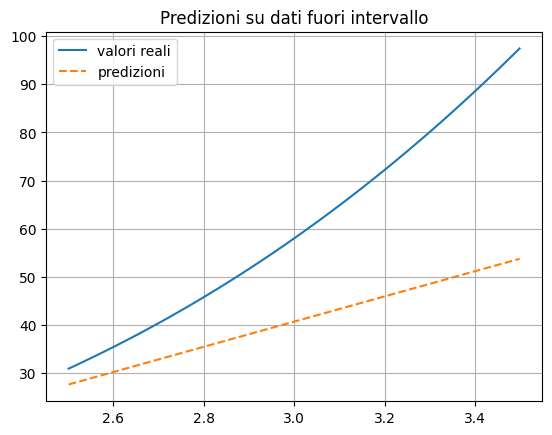

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# parametri della funzione target f(x) = ax^3 + bx^2 + cx + d
a = 3 
b = -2
c = -3
d = 4 
epoche = 30

# imposto i seed per replicabilità dei dati
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#genero i dati di validazione e di allenamento
x_train = np.random.uniform(-2.5, 2.5, 1000)
x_valid = np.random.uniform(-2.5, 2.5, 100)
x_valid.sort()
y_target = a * (x_valid**3) + b * (x_valid**2) + c * x_valid + d # funzione target ideale
#generazione di dati fuori dall'intervallo di validazione ed allenamento
x_out = np.random.uniform(2.5, 3.5, 100)
x_out.sort()
y_out_target = a * (x_out**3) + b * (x_out**2) + c * x_out + d #funzione target fuori intervallo

sigma = 0.0 # rumore nei dati
#ordinate dei dati di validazione, addestramento e di quelli fuori intervallo
y_train = np.random.normal(a * (x_train**3) + b * (x_train**2) + c * x_train + d, sigma) 
y_valid = np.random.normal(a * (x_valid**3) + b * (x_valid**2) + c * x_valid + d, sigma)
y_out = np.random.normal(a * (x_out**3) + b * (x_out**2) + c * x_out + d,sigma) 

#inizializzo la rete neurale
model = tf.keras.Sequential()
model.add(Dense(60, input_shape=(1,), activation='relu')) 
model.add(Dense(1, activation='linear')) #uso linear nell'output layer perchè la funzione polinomiale può assumere valori di ogni tipo


#ciclo di addestramento
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=epoche,
          shuffle=True, # mischio i dati ad ogni epoca
          validation_data=(x_valid, y_valid),
          verbose=0)

#calcolo la loss (quindi MSE) su x_out
y_pred = model.predict(x_out, verbose=0)
mse_out = tf.reduce_mean(tf.square(y_pred.flatten() - y_out)).numpy()
print(f"Out-of-range loss (MSE): {mse_out:.5f}")

#calcolo e stampo la loss sui dati di addestramento e validazione
loss_train = model.evaluate(x_train, y_train, verbose=0)
loss_valid = model.evaluate(x_valid, y_valid, verbose=0)
print(f"Training loss: {loss_train}")
print(f"Validation loss: {loss_valid}")

#plotto la loss sui dati di validazione e addestramento
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss su diversi dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.close()

# Plotto funzione target, validation data e predizione della rete neurale
y_pred_valid = model.predict(x_valid, verbose=0)
plt.plot(x_valid, y_target, label='valori reali')
plt.plot(x_valid, y_pred_valid, label='predizioni', linestyle='--')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.title("Predizioni su validation data")
plt.show()

plt.close()

#plotto predizione della rete neurale su x_out e funzione target su x_out
plt.plot(x_out, y_out_target, label='valori reali')
plt.plot(x_out, y_pred, label='predizioni', linestyle='--')
plt.legend()
plt.grid(True)
plt.title("Predizioni su dati fuori intervallo")
plt.show()

plt.close()

## Analisi e commento
La rete neurale è stata costruita basandosi sul teorema di Lu  sul universal approximation per reti con larghezza limitata. Tale teorema stabilisce che per approssimare qualsiasi funzione Lebesgue integrabile in $n$ dimensioni è necessaria una rete neurale con layer di minimo $n+1$ neuroni con funzione di attivazione $ReLu$. In questo caso di funzione polinomiale 1D ho utilizzato un layer di $60$ neuroni. In generale si osserva una diminuzione significativa della loss e una migliore predizione sui dati fuori intervallo che sui dati di addestramento e validazione al crescere di neuroni nello strato nascosto. Per funzioni non lineari è necessaria una funzione di attivazione non lineare, come $ReLu$. Il neurone di output invece ha funzione di attivazione lineare perchè la funzione polinomiale può assumere qualsiasi valore reale. Si nota come aumentando la complessità della rete neurale aggiungendo hidden layer la prestazione peggiora invece di migliorare, soprattutto con l'utilizzo di optimizer non opportunamente controllati che portano a una over-parametrizzazione e più difficoltà nell'addestramento.

Per diminuire la loss e rendere più efficaci le previsioni sui dati si può sia agire sulle dimensioni dell'hidden layer, sia aumentare le epoche di addestramento scongiurando però l'overfitting.

Come optimizers ho scelto $sgd$, il più semplice e basilare, adatto anche per funzioni polinomiali. Come loss ho scelto $mse$, ottima per problemi di regressione come questo.

La rete neurale apprende bene la funzione polinomiale nel range di training mostrando una buona accuratezza nelle predizioni su dati nuovi all'interno di questo intervallo. Tuttavia, le prestazioni calano significativamente fuori da questo intervallo, a causa della natura intrinseca delle reti neurali che sono progettate principalmente per interpolare e non per estrapolare. In pratica apprende ottimamente nell'intervallo e approssima la funzione target in questo; ma rimane un'approssimazione, il comportamento al di fuori dell'intervallo non rientra in ciò che ha imparato la rete e potrebbe deviare molto rispetto all'approssimazione della funzione target interpolata dalla rete dentro l'intervallo di addestramento. Inoltre, la complessità del modello influenza questo comportamento: un modello troppo semplice non cattura bene la funzione, mentre uno troppo complesso può overfittare, peggiorando la capacità di generalizzazione, in particolare fuori dal range di addestramento.


# Esercizio 11.3
L'esercizio richiede di eseguire un fit della funzione:
$$
f(x,y) = \sin(x^2+y^2)
$$ nell'intervallo $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

Training loss: 0.00091
Validation loss: 0.00212


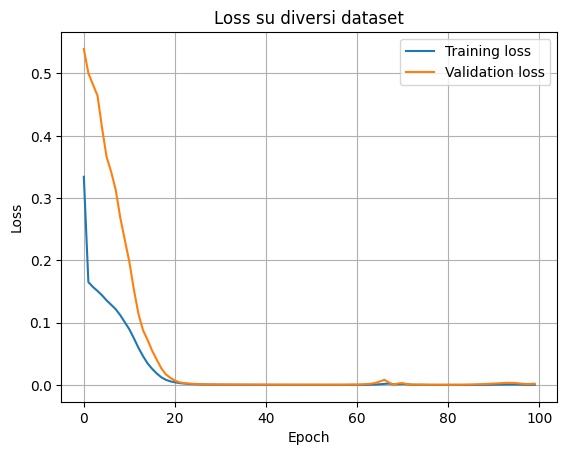

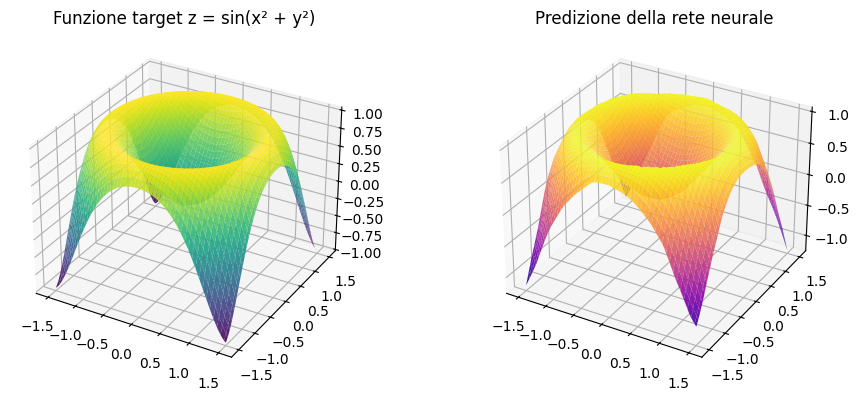

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from mpl_toolkits.mplot3d import Axes3D

epoche = 100

# imposto i seed per replicabilità dei dati
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#genero i dati di validazione e di allenamento
x_train = np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, 100)
x_valid.sort()
y_train = np.random.uniform(-1.5, 1.5, 1000)
y_valid = np.random.uniform(-1.5, 1.5, 100)
y_valid.sort()
z_target = np.sin(x_valid**2 + y_valid**2) # funzione target ideale

# Stack input data into shape (N, 2)
X_train = np.stack((x_train, y_train), axis=1)
X_valid = np.stack((x_valid, y_valid), axis=1)

sigma = 0.0 # rumore nei dati
#ordinate dei dati di validazione e di addestramento 
z_train = np.random.normal(np.sin(x_train**2 + y_train**2), sigma) 
z_valid = np.random.normal(np.sin(x_valid**2 + y_valid**2), sigma)

#inizializzo la rete neurale
model = tf.keras.Sequential()
model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear')) #uso linear nell'output layer perchè la funzione può assumere valori di ogni tipo


#ciclo di addestramento
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, z_train,
                    batch_size=32, epochs=epoche,
                    validation_data=(X_valid, z_valid),
                    verbose=0)

#calcolo e stampo la loss sui dati di addestramento e validazione
loss_train = model.evaluate(X_train, z_train, verbose=0)
loss_valid = model.evaluate(X_valid, z_valid, verbose=0)
print(f"Training loss: {loss_train:.5f}")
print(f"Validation loss: {loss_valid:.5f}")

#plotto la loss sui dati di validazione e addestramento
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss su diversi dataset')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.close()

# Costruisco griglia 2D di punti per il plotting
grid_x, grid_y = np.meshgrid(np.linspace(-1.5, 1.5, 100),
                             np.linspace(-1.5, 1.5, 100))

# creo gli input per la rete neurale
grid_inputs = np.stack([grid_x.ravel(), grid_y.ravel()], axis=1) 

# Predizione del modello su tutti i punti della griglia
z_pred = model.predict(grid_inputs, verbose=0).reshape(grid_x.shape)

# Calcolo la funzione target vera per confronto
z_true = np.sin(grid_x**2 + grid_y**2)

# --- PLOT 3D delle predizioni della rete neurale ---
fig = plt.figure(figsize=(10, 4))

# Subplot 1: Funzione target
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(grid_x, grid_y, z_true, cmap='viridis', alpha=0.9)
ax1.set_title("Funzione target z = sin(x² + y²)")

# Subplot 2: Predizione del modello
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(grid_x, grid_y, z_pred, cmap='plasma', alpha=0.9)
ax2.set_title("Predizione della rete neurale")

plt.tight_layout()
plt.show()

## Analisi e commento
Questo esercizio richiede una rete neurale più complessa perchè la funzione su cui eseguire il fit è più complessa. E' necessaria l'aggiunta di diversi hidden layer senza però rendere la rete neurale troppo complessa provocando una over-parametrizzazione. Un aumento degli hidden layer infatti migliora la loss ma c'è sempre il rischio di un'eccessiva complessità che inficia l'efficienza e l'affidabilità della predizione della rete. Anche aumentare il numero di neuroni negli hidden layer e il numero di epoche migliora la predizione, prestando sempre attenzione al rischio di overfitting. Si noti che la rete neurale necessita di due neuroni di input, uno per la $x$ e uno per la $y$. 

Data la complessità sia della rete neurale (più strati e neuroni) sia della funzione da approssimare, ho scelto di usare l’ottimizzatore $adam$. A differenza di $sgd$, che è più semplice, $adam$ adatta dinamicamente alcuni dei suoi parametri come il learning rate, aiutando la rete a convergere più velocemente e in modo più stabile.
$sgd$, senza un accurato controllo dei parametri, rischia facilmente di bloccarsi in minimi locali o di avere una convergenza lenta, specialmente in reti più complesse. Perciò, $adam$ è spesso preferito in questi casi perché migliora la capacità di esplorare lo spazio delle soluzioni e raggiungere minimi globali.

Si osserva un'ottima predizione della funzione target grazie a un considerevole numero di epoche e più hidden layer. Tuttavia ciò che ha migliorato notevolmente le capacità predittive della rete è l'ottimizzatore $adam$. Utilizzando $sgd$ infatti si ottengono risultati apprezzabili ma non ottimali. Questo dimostra che una rete neurale efficiente richiede non solo una buona architettura (numero di layer e neuroni) e un adeguato numero di epoche, ma anche la scelta di un ottimizzatore adeguato al tipo di problema da risolvere.